In [ ]:
"""
Purpose: To Practice splitting different 
versions and then pushing the changes to 
neuroglancer


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

INFO - 2021-01-19 18:01:41,247 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-19 18:01:41,249 - settings - Setting database.user to celiib
INFO - 2021-01-19 18:01:41,249 - settings - Setting database.password to newceliipass
INFO - 2021-01-19 18:01:41,253 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-19 18:01:41,254 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-19 18:01:41,266 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-19 18:01:41,533 - settings - Setting enable_python_native_blobs to True


In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-19 18:01:41,623 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-19 18:01:41,888 - settings - Setting enable_python_native_blobs to True


# Picking the Neuron

In [115]:
segment_id = 864691135373436616 #worked (but needed a branch sharp angling)
segment_id = 864691135568932230 #worked
segment_id = 864691135081756919

In [116]:
neuron_obj = (minnie.Decomposition & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [122]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Visualizing the Error Branches

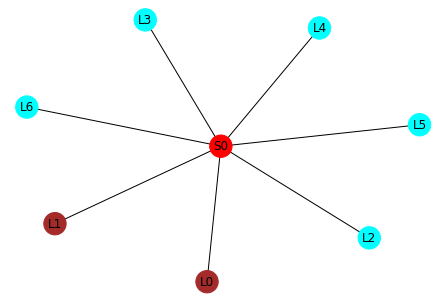

In [118]:
nviz.plot_soma_limb_concept_network(neuron_obj)

# Running the Splitting Algorithm

multi_soma_limbs = []
multi_touch_limbs = [0 1]


 -------- Working on limb 0------------
Starting combinations to process = [[ 34  45]
 [ 34  50]
 [ 34  52]
 [ 34  75]
 [ 34  77]
 [ 34  82]
 [ 34 104]
 [ 45  50]
 [ 45  52]
 [ 45  75]
 [ 45  77]
 [ 45  82]
 [ 45 104]
 [ 50  52]
 [ 50  75]
 [ 50  77]
 [ 50  82]
 [ 50 104]
 [ 52  75]
 [ 52  77]
 [ 52  82]
 [ 52 104]
 [ 75  77]
 [ 75  82]
 [ 75 104]
 [ 77  82]
 [ 77 104]
 [ 82 104]]


---- working on disconnecting 34 and 45
---- This disconnects S0_3 from S0_5  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [34, 25, 24, 36, 45]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 1 16 24 25 26 27 36 46]
Short segments to combine = []
Found 1 high degree coordinates to cut
Picking [789391.31159321 748476.650764   699809.895170

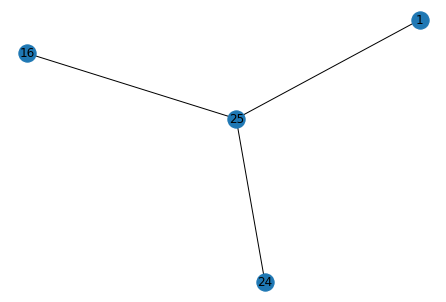

match_branches = [[1, 25], [16, 24]]
edges_to_delete (resolve crossover) = [[1, 16], [1, 24], [16, 25], [24, 25]]
edges_to_create (resolve crossover) = [[1, 25], [16, 24]]
curr_limb.deleted_edges 5 =[]
NOT USING the resolve crossover delete edges because will help seperate the path
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [34 25]: curr_angle = 55.19
  Edge: [25 24]: curr_angle = 79.22
  Edge: [24 36]: curr_angle = 33.94
  Edge: [36 45]: curr_angle = 39.41

Total time for doubling_back = 0.20995712280273438

Attempting the width jump check (ARTIFICIALLY ATTEMPTING FROM BOTH SIDES)
width_jump_threshold = 200
  Edge: [34 25]: jump = -328.86
  Edge: [25 24]: jump = -117.72
  Edge: [24 36]: jump = 63.96
  Edge: [36 45]: jump = 191.07
Total time for width = 0.18374109268188477
first_error_sizes = [-inf, 328.8564080612472], first_error_locations = [inf, 3], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [25, 27, 34]
25 = red
27 = aqua
34 = purple
Angle between 25 and 27 = 95.01 
Angle between 25 and 34 = 46.08 
Angle between 27 and 34 = 45.58 
Final Matches = []
matched_branches_revised = []
Original graph


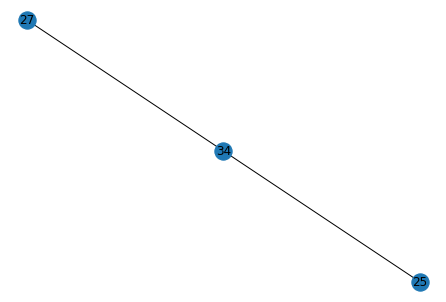

match_branches = []
edges_to_delete (resolve crossover) = [[25, 27], [25, 34], [27, 34]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([25, 27]), array([25, 34]), array([27, 34])]
edges_to_create = []
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158}
Comp 1 = {34}
curr_limb_copy.delet

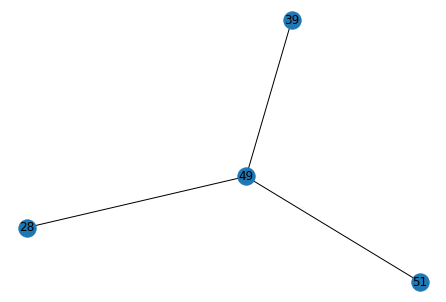

match_branches = [[39, 51], [28, 49]]
edges_to_delete (resolve crossover) = [[28, 39], [28, 51], [39, 49], [49, 51]]
edges_to_create (resolve crossover) = [[39, 51], [28, 49]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34])]
NOT USING the resolve crossover delete edges because will help seperate the path
Picking [826048. 780305. 736391.] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([25, 27]), array([25, 34]), array([27, 34])]
***inside resolve crossover!!!!****
coordinate_branches = [40, 64, 69, 72, 74, 80]
40 = red
64 = aqua
69 = purple
72 = green
Angle between 40 and 64 = 171.81 
Angle between 40 and 69 = 23.54 
Angle between 40 and 72 = 154.13 
Angle between 40 and 74 = 146.99 
Angle between 40 and 80 = 160.37 
Angle between 64 and 69 = 31.72 
Angle between 64 and 72 = 155.82 
Angle between 64 and 74 = 148.35 
Angle between 64 and 80 = 154.38 
Angle between 69 and 72 = 40.09 
Angle between 69 and 74 = 44.73 
Angle between 69 and 80 = 

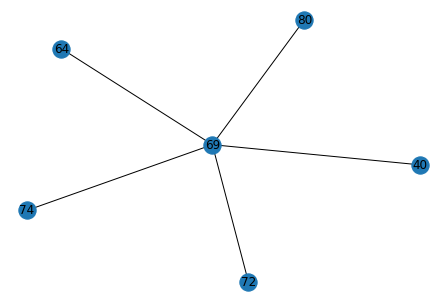

match_branches = [[69, 80]]
edges_to_delete (resolve crossover) = [[40, 64], [40, 69], [40, 72], [40, 74], [40, 80], [64, 69], [64, 72], [64, 74], [64, 80], [69, 72], [69, 74], [72, 74], [72, 80], [74, 80]]
edges_to_create (resolve crossover) = [[69, 80]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34])]
NOT USING the resolve crossover delete edges because will help seperate the path
Picking [827386. 797053. 753666.] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([25, 27]), array([25, 34]), array([27, 34])]
***inside resolve crossover!!!!****
coordinate_branches = [79, 81, 87, 88]
79 = red
81 = aqua
87 = purple
88 = green
Angle between 79 and 81 = 158.36 
Angle between 79 and 87 = 33.35 
Angle between 79 and 88 = 11.51 
Angle between 81 and 87 = 53.28 
Angle between 81 and 88 = 22.57 
Angle between 87 and 88 = 148.55 
Final Matches = [[79, 87], [79, 88], [81, 88]]
matched_branches_revised = [[79, 88]]
Original graph


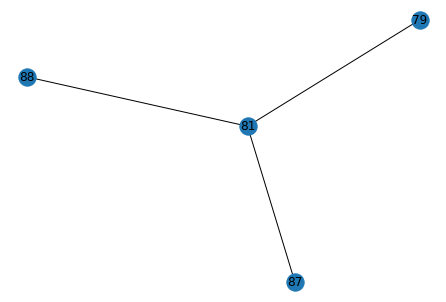

match_branches = [[79, 88]]
edges_to_delete (resolve crossover) = [[79, 81], [79, 87], [81, 87], [81, 88], [87, 88]]
edges_to_create (resolve crossover) = [[79, 88]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34])]
NOT USING the resolve crossover delete edges because will help seperate the path
Picking [834596. 754025. 714108.] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([25, 27]), array([25, 34]), array([27, 34])]
***inside resolve crossover!!!!****
coordinate_branches = [85, 97, 105, 106, 107]
85 = red
97 = aqua
105 = purple
106 = green
Angle between 85 and 97 = 108.16 
Angle between 85 and 105 = 55.14 
Angle between 85 and 106 = 59.28 
Angle between 85 and 107 = 8.5 
Angle between 97 and 105 = 99.26 
Angle between 97 and 106 = 21.08 
Angle between 97 and 107 = 66.92 
Angle between 105 and 106 = 78.35 
Angle between 105 and 107 = 116.5 
Angle between 106 and 107 = 127.57 
Final Matches = [[85, 107], [97, 106]]
matched_branches_revised

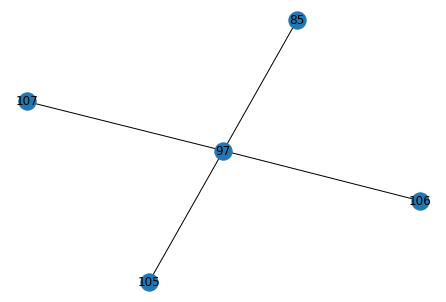

match_branches = [[85, 107], [97, 106]]
edges_to_delete (resolve crossover) = [[85, 97], [85, 105], [85, 106], [97, 105], [97, 107], [105, 106], [105, 107], [106, 107]]
edges_to_create (resolve crossover) = [[85, 107], [97, 106]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34])]
NOT USING the resolve crossover delete edges because will help seperate the path
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [45 46]: curr_angle = 47.92
  Edge: [46 49]: curr_angle = 29.98
  Edge: [49 51]: curr_angle = 111.16
  Edge: [51 59]: curr_angle = 37.72
  Edge: [59 78]: curr_angle = 78.59
  Edge: [78 98]: curr_angle = 29.58
  Edge: [98 97]: curr_angle = 155.38
  Edge: [97 85]: curr_angle = 98.65
  Edge: [85 70]: curr_angle = 86.43
  Edge: [70 69]: curr_angle = 46.39
  Edge: [69 80]: curr_angle = 18.32
  Edge: [80 79]: curr_angle = 20.01
  Edge: [79 81]: curr_angle = 145.11
  Edge: [81 58]: curr_angle = 14.67
  Edge: [58 53]: curr_angle = 16.91
  Edge: [53 43]: curr_angle = 134.85
  Edge: [43  8]: curr_angle = 16.99
  Edge: [8 9]: curr_angle = 159.83
  Edge: [ 9 27]: curr_angle = 48.93
  Edge: [27 23]: curr_angle = 143.57
  Edge: [23 22]: curr_angle = 91.34
  Edge: [22 21]: curr_angle = 123.79
  Edge: [21 30]: curr_angle = 19.73
  Edge: [30 50]: curr_angle = 34.05

Total time for doubling_back = 1.3961694240570068
There were 10 edges that passed doubling back threshold of 80
Winning edge [8 9]

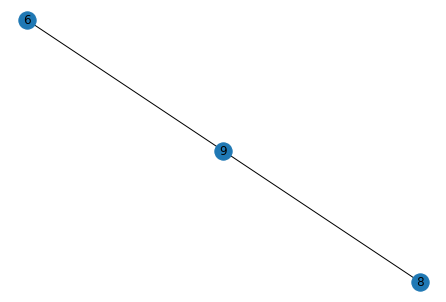

match_branches = []
edges_to_delete (resolve crossover) = [[6, 8], [6, 9], [8, 9]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([6, 8]), array([6, 9]), array([8, 9])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {7, 9, 10, 15, 50, 19, 21, 22, 23, 27, 30}
Comp 1 = {2, 4, 6}
Comp 2 = {0, 1, 3, 5, 8, 11, 12, 13, 14, 16, 17, 18, 20, 24, 25, 26, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158}
Comp 3 = {34}
curr_limb_co

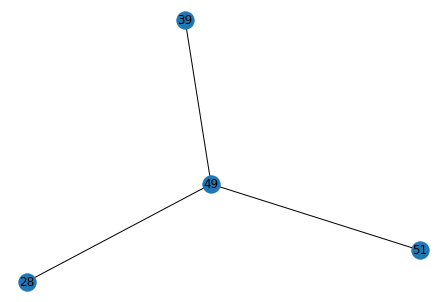

match_branches = [[39, 51], [28, 49]]
edges_to_delete (resolve crossover) = [[28, 39], [28, 51], [39, 49], [49, 51]]
edges_to_create (resolve crossover) = [[39, 51], [28, 49]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9])]
NOT USING the resolve crossover delete edges because will help seperate the path
Picking [826048. 780305. 736391.] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9])]
***inside resolve crossover!!!!****
coordinate_branches = [40, 64, 69, 72, 74, 80]
40 = red
64 = aqua
69 = purple
72 = green
Angle between 40 and 64 = 171.81 
Angle between 40 and 69 = 23.54 
Angle between 40 and 72 = 154.13 
Angle between 40 and 74 = 146.99 
Angle between 40 and 80 = 160.37 
Angle between 64 and 69 = 31.72 
Angle between 64 and 72 = 155.82 
Angle between 64 and 74 = 148.35 
Angle between 64 and 80 = 154.38 
An

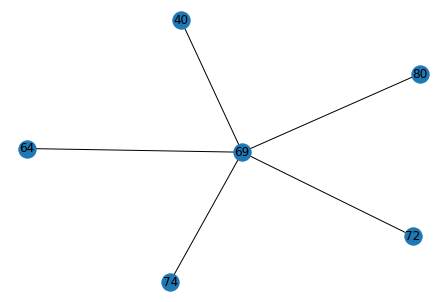

match_branches = [[69, 80]]
edges_to_delete (resolve crossover) = [[40, 64], [40, 69], [40, 72], [40, 74], [40, 80], [64, 69], [64, 72], [64, 74], [64, 80], [69, 72], [69, 74], [72, 74], [72, 80], [74, 80]]
edges_to_create (resolve crossover) = [[69, 80]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9])]
NOT USING the resolve crossover delete edges because will help seperate the path
Picking [827386. 797053. 753666.] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9])]
***inside resolve crossover!!!!****
coordinate_branches = [79, 81, 87, 88]
79 = red
81 = aqua
87 = purple
88 = green
Angle between 79 and 81 = 158.36 
Angle between 79 and 87 = 33.35 
Angle between 79 and 88 = 11.51 
Angle between 81 and 87 = 53.28 
Angle between 81 and 88 = 22.57 
Angle between 87 and 88 = 148.55 
Final Matches = [[79, 87], [79, 88

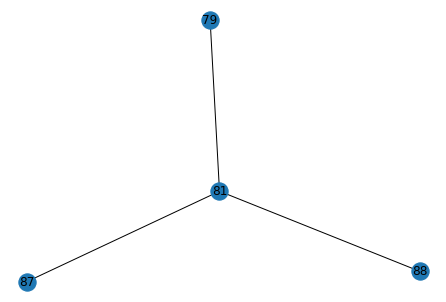

match_branches = [[79, 88]]
edges_to_delete (resolve crossover) = [[79, 81], [79, 87], [81, 87], [81, 88], [87, 88]]
edges_to_create (resolve crossover) = [[79, 88]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9])]
NOT USING the resolve crossover delete edges because will help seperate the path
Picking [834596. 754025. 714108.] high degree coordinates to cut
curr_limb.deleted_edges 4=[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9])]
***inside resolve crossover!!!!****
coordinate_branches = [85, 97, 105, 106, 107]
85 = red
97 = aqua
105 = purple
106 = green
Angle between 85 and 97 = 108.16 
Angle between 85 and 105 = 55.14 
Angle between 85 and 106 = 59.28 
Angle between 85 and 107 = 8.5 
Angle between 97 and 105 = 99.26 
Angle between 97 and 106 = 21.08 
Angle between 97 and 107 = 66.92 
Angle between 105 and 106 = 78.35 
Angle between 105 and 107 = 116.5 
Angle bet

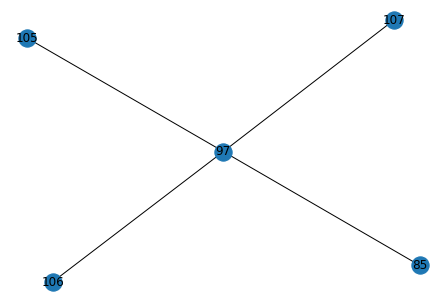

match_branches = [[85, 107], [97, 106]]
edges_to_delete (resolve crossover) = [[85, 97], [85, 105], [85, 106], [97, 105], [97, 107], [105, 106], [105, 107], [106, 107]]
edges_to_create (resolve crossover) = [[85, 107], [97, 106]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9])]
NOT USING the resolve crossover delete edges because will help seperate the path
Skipping endnode 52 because skeletal distance was 453.22621593600496 and threshold was 2500
skip_nodes = [52]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [45 46]: curr_angle = 47.92
  Edge: [46 49]: curr_angle = 29.98
  Edge: [49 51]: curr_angle = 111.16
  Edge: [51 59]: curr_angle = 37.72
  Edge: [59 78]: curr_angle = 78.59
  Edge: [78 98]: curr_angle = 29.58
  Edge: [98 97]: curr_angle = 155.38
  Edge: [97 85]: curr_angle = 98.65
  Edge: [85 70]: curr_angle = 86.43
  Edge: [70 69]: curr_angle = 46.39
  Edge: [69 80]: curr_angle = 18.32
  Edge: [80 79]: curr_angle = 20.01
  Edge: [79 81]: curr_angle = 145.11
  Edge: [81 58]: curr_angle = 14.67
  Edge: [58 53]: curr_angle = 16.91
  Edge: [53 43]: curr_angle = 134.85

Total time for doubling_back = 0.7415964603424072
There were 6 edges that passed doubling back threshold of 80
Winning edge [98 97] had a doubling back of 155.37533976254056
***inside resolve crossover!!!!****
coordinate_branches = [94, 97, 98]
94 = red
97 = aqua
98 = purple
Angle between 94 and 97 = 19.21 
Angle between 94 and 98 = 18.98 
Angle between 97 and 98 = 174.12 
Final Matches = [[94, 97], [94, 98]]
matche

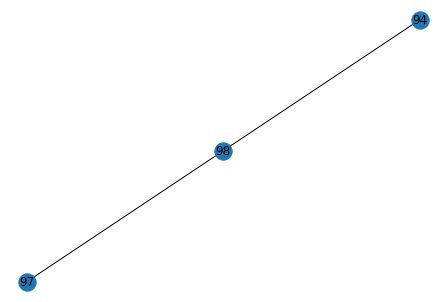

match_branches = [[94, 98]]
edges_to_delete (resolve crossover) = [[94, 97], [97, 98]]
edges_to_create (resolve crossover) = [[94, 98]]
edges_to_delete (cut_limb_network) = [array([94, 97]), array([97, 98])]
edges_to_create = [[94, 98]]
Number of connected components = 4
Comp 0 = {7, 9, 10, 15, 50, 19, 21, 22, 23, 27, 30}
Comp 1 = {2, 4, 6}
Comp 2 = {0, 1, 3, 5, 8, 11, 12, 13, 14, 16, 17, 18, 20, 24, 25, 26, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158}
Comp 3 = {34}
cur

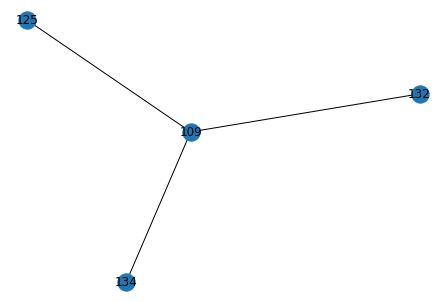

match_branches = [[125, 134], [109, 132]]
edges_to_delete (resolve crossover) = [[109, 125], [109, 134], [125, 132], [132, 134]]
edges_to_create (resolve crossover) = [[125, 134], [109, 132]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9]), array([94, 97]), array([97, 98])]
NOT USING the resolve crossover delete edges because will help seperate the path
Skipping endnode 52 because skeletal distance was 453.22621593600496 and threshold was 2500
skip_nodes = [52]

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [45 46]: curr_angle = 47.92
  Edge: [46 49]: curr_angle = 29.98
  Edge: [49 51]: curr_angle = 111.16
  Edge: [51 57]: curr_angle = 137.29
  Edge: [57 56]: curr_angle = 31.46
  Edge: [56 60]: curr_angle = 81.26
  Edge: [ 60 102]: curr_angle = 25.21
  Edge: [102  90]: curr_angle = 60.45
  Edge: [90 91]: curr_angle = 111.51
  Edge: [ 91 112]: curr_angle = 7.85
  Edge: [112 125]: curr_angle = 25.26
  Edge: [125 109]: curr_angle = 159.46
  Edge: [109 108]: curr_angle = 124.17
  Edge: [108 106]: curr_angle = 69.33
  Edge: [106  97]: curr_angle = 22.44
  Edge: [97 85]: curr_angle = 98.65
  Edge: [85 70]: curr_angle = 86.43
  Edge: [70 69]: curr_angle = 46.39
  Edge: [69 80]: curr_angle = 18.32
  Edge: [80 79]: curr_angle = 20.01
  Edge: [79 81]: curr_angle = 145.11
  Edge: [81 58]: curr_angle = 14.67
  Edge: [58 53]: curr_angle = 16.91
  Edge: [53 43]: curr_angle = 134.85

Total time for doubling_back = 0.9979290962219238
There were 10 edges that passed doubling back threshold of 80
W

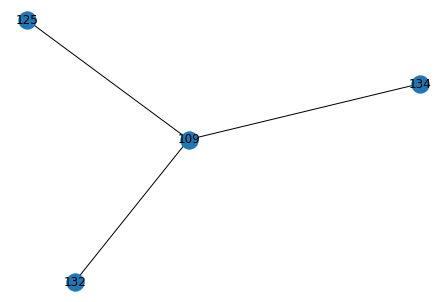

match_branches = [[109, 134], [125, 132]]
edges_to_delete (resolve crossover) = [[109, 125], [109, 132], [125, 134], [132, 134]]
edges_to_create (resolve crossover) = [[109, 134], [125, 132]]
edges_to_delete (cut_limb_network) = [array([109, 125]), array([109, 132]), array([125, 134]), array([132, 134])]
edges_to_create = [[109, 134], [125, 132]]
Number of connected components = 6
Comp 0 = {7, 9, 10, 15, 50, 19, 21, 22, 23, 27, 30}
Comp 1 = {2, 4, 6}
Comp 2 = {8, 11, 12, 13, 14, 17, 18, 20, 29, 33, 35, 37, 38, 40, 41, 42, 43, 47, 52, 53, 54, 58, 62, 64, 65, 66, 68, 69, 70, 71, 72, 74, 76, 77, 79, 80, 81, 85, 86, 87, 88, 89, 92, 95, 96, 97, 99, 100, 104, 105, 106, 107, 108, 109, 113, 114, 115, 116, 118, 119, 121, 122, 124, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145, 146, 150, 151, 152, 153, 154, 157, 158}
Comp 3 = {0, 1, 3, 132, 5, 140, 141, 16, 147, 148, 149, 24, 25, 26, 155, 28, 156, 31, 32, 36, 39, 44, 45, 46, 48, 49, 51, 55, 56, 57, 59, 60, 61, 63, 67,

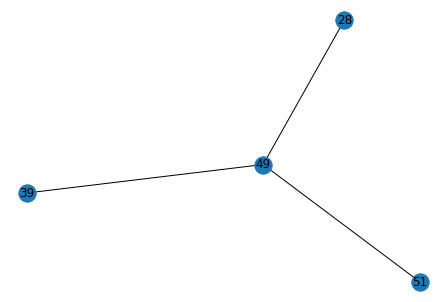

match_branches = [[39, 51], [28, 49]]
edges_to_delete (resolve crossover) = [[28, 39], [28, 51], [39, 49], [49, 51]]
edges_to_create (resolve crossover) = [[39, 51], [28, 49]]
curr_limb.deleted_edges 5 =[array([25, 27]), array([25, 34]), array([27, 34]), array([6, 8]), array([6, 9]), array([8, 9]), array([94, 97]), array([97, 98]), array([109, 125]), array([109, 132]), array([125, 134]), array([132, 134])]
NOT USING the resolve crossover delete edges because will help seperate the path
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  Edge: [45 46]: curr_angle = 47.92
  Edge: [46 49]: curr_angle = 29.98
  Edge: [49 51]: curr_angle = 111.16
  Edge: [51 59]: curr_angle = 37.72
  Edge: [59 73]: curr_angle = 46.16
  Edge: [73 75]: curr_angle = 19.43

Total time for doubling_back = 0.17381858825683594
There were 1 edges that passed doubling back threshold of 80
Winning edge [49 51] had a doubling back of 111.15735078279374
***inside resolve crossover!!!!****
coordinate_branches = [28, 39, 49, 51]
28 = red
39 = aqua
49 = purple
51 = green
Angle between 28 and 39 = 134.32 
Angle between 28 and 49 = 37.77 
Angle between 28 and 51 = 59.81 
Angle between 39 and 49 = 64.65 
Angle between 39 and 51 = 44.6 
Angle between 49 and 51 = 84.13 
Final Matches = []
matched_branches_revised = []
Original graph


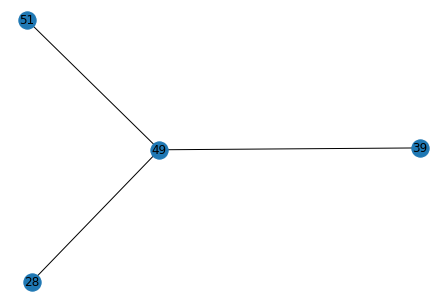

match_branches = []
edges_to_delete (resolve crossover) = [[28, 39], [28, 49], [28, 51], [39, 49], [39, 51], [49, 51]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([28, 39]), array([28, 49]), array([28, 51]), array([39, 49]), array([39, 51]), array([49, 51])]
edges_to_create = []
Number of connected components = 9
Comp 0 = {7, 9, 10, 15, 50, 19, 21, 22, 23, 27, 30}
Comp 1 = {2, 4, 6}
Comp 2 = {8, 11, 12, 13, 14, 17, 18, 20, 29, 33, 35, 37, 38, 40, 41, 42, 43, 47, 52, 53, 54, 58, 62, 64, 65, 66, 68, 69, 70, 71, 72, 74, 76, 77, 79, 80, 81, 85, 86, 87, 88, 89, 92, 95, 96, 97, 99, 100, 104, 105, 106, 107, 108, 109, 113, 114, 115, 116, 118, 119, 121, 122, 124, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145, 146, 150, 151, 152, 153, 154, 157, 158}
Comp 3 = {0, 1, 3, 36, 44, 45, 46, 16, 49, 24, 25, 26}
Comp 4 = {34}
Comp 5 = {28}
Comp 6 = {32, 5, 39}
Comp 7 = {132, 140, 141, 147, 148, 149, 155, 156, 31, 48, 51, 55, 56, 57, 59,

KeyboardInterrupt: 

In [121]:
import proofreading_utils as pru
limb_results = pru.multi_soma_split_suggestions(neuron_obj,
                                                plot_intermediates=False,
                                               plot_cut_coordinates=False)

In [107]:
limb_obj.all_starting_coordinates

array([[818175.24880952, 443812.63333333, 809833.17738095],
       [818841.01219512, 435357.13414634, 810292.0097561 ],
       [822332.8625    , 446957.4       , 809322.675     ],
       [733289.        , 444443.        , 715609.        ],
       [663061.54042553, 427063.84468085, 676602.85319149]])

In [108]:
limb_g = sk.convert_skeleton_to_graph(limb_obj.skeleton)

In [109]:
import networkx_utils as xu

In [ ]:
recovered_touching_piece = xu.get_nodes_with_attributes_dict(curr_limb_concept_network,dict(starting_coordinate=closest_endpoint))

In [105]:
import networkx_utils as xu

In [ ]:
xu.get

# Plotting the Splitting Algorithm Results

In [120]:
nviz.plot_split_suggestions_per_limb(neuron_obj,
                                    limb_results=limb_results,
                                    scatter_size=0.3)



-------- Suggestions for Limb 0------

 Working on visualization type: mesh

 Working on visualization type: skeleton




-------- Suggestions for Limb 1------

 Working on visualization type: mesh

 Working on visualization type: skeleton


# Doing the Simple Split Neuroglancer Link

In [ ]:
split_coordinates = pru.get_all_coordinate_suggestions(limb_results)

pru.neuroglancer_split_link(split_coordinates,
                      neuron_obj.segment_id)

# Doing the More Complex Neuroglancer Link

In [ ]:
pru.split_info_to_neuroglancer_link(segment_id=segment_id,
                split_info=limb_results)